### Assignment Submission - Asset Pricing
> Student Name : Ankit Rawat

> Batch : G2 

In [18]:
### Import Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import scipy.stats as stats

In [3]:
### Setup Allignment

In [4]:
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 12)
pd.set_option("display.width", 110)
pd.set_option("precision", 3)
pd.set_option("max_rows", 10)
pd.set_option("min_rows", 3)

%matplotlib inline


> ## 1. Load Data

In [17]:
#data  = pd.read_csv("Industry_Portfolios.csv")
#data.head(2)

In [18]:
data  = pd.read_csv("portfolio_return.csv")
data.head(2)

         Date     FB   GOOG   NVDA     MA   ADBE       NFLX   QCOM    CRM   GILD     CL
0  2014-01-02    NaN    NaN    NaN    NaN    NaN        NaN    NaN    NaN    NaN    NaN
1  2014-01-03 -0.003 -0.007 -0.012 -0.004 -0.002  7.718e-04 -0.006  0.005 -0.012 -0.002

> Data Wragling
>> Verify any null data
>> Date formating 
>> Create copy 

In [19]:
data.isnull().sum()
#data["Date"] = pd.to_datetime(data['Date'],format='%Y%m')
df  = data.copy()
df.set_index( "Date", inplace =True)

> ### 2.Calculate mean returns

In [20]:
R = pd.DataFrame(df.mean())
R_array = np.array(R)

In [21]:
print ("Expected Mean of the given data is :\n {} ".format(R))

Expected Mean of the given data is :
               0
FB    1.123e-03
GOOG  7.603e-04
NVDA  2.413e-03
MA    8.957e-04
ADBE  1.356e-03
NFLX  1.647e-03
QCOM  6.582e-04
CRM   1.067e-03
GILD  1.081e-04
CL    2.880e-04 


> ### 3. Calculate covariance matrix of returns for the ten industry portfolios

In [22]:
Covmatrix = df.cov()
print ("Convariance of the given data is :\n {} ".format(Covmatrix))

Convariance of the given data is :
              FB       GOOG       NVDA         MA       ADBE       NFLX       QCOM        CRM       GILD  \
FB    4.170e-04  2.207e-04  2.527e-04  1.966e-04  2.237e-04  2.352e-04  1.364e-04  2.382e-04  1.083e-04   
GOOG  2.207e-04  2.741e-04  2.304e-04  1.831e-04  1.984e-04  2.092e-04  1.568e-04  1.954e-04  1.034e-04   
NVDA  2.527e-04  2.304e-04  7.481e-04  2.578e-04  2.848e-04  2.785e-04  2.726e-04  2.853e-04  1.322e-04   
MA    1.966e-04  1.831e-04  2.578e-04  2.964e-04  2.138e-04  1.731e-04  1.714e-04  2.195e-04  1.051e-04   
ADBE  2.237e-04  1.984e-04  2.848e-04  2.138e-04  3.630e-04  2.408e-04  1.877e-04  2.832e-04  1.189e-04   
NFLX  2.352e-04  2.092e-04  2.785e-04  1.731e-04  2.408e-04  7.203e-04  1.673e-04  2.557e-04  1.345e-04   
QCOM  1.364e-04  1.568e-04  2.726e-04  1.714e-04  1.877e-04  1.673e-04  4.546e-04  1.676e-04  9.958e-05   
CRM   2.382e-04  1.954e-04  2.853e-04  2.195e-04  2.832e-04  2.557e-04  1.676e-04  4.603e-04  1.230e-04   
G

> ### 4. Standard Deviation 

In [23]:
Std_Deviation = np.sqrt(np.diagonal(Covmatrix).round(2))
print ("Std_Deviation of the given data is :\n {} ".format(Std_Deviation))

Std_Deviation of the given data is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 


> ### 4. Validate covariance is Symmetric and positive definite 

In [24]:
Covmatrix_array = np.array(Covmatrix)
Covmatrix_inverse = np.linalg.inv(Covmatrix_array) 
print ( " Covariance matrix is Symmetric : \n {}".format(Covmatrix - Covmatrix_array))
print ("\n")
print ( " Covariance matrix is Invertible : \n {}".format(Covmatrix_array.dot(Covmatrix_inverse).round(2)))

 Covariance matrix is Symmetric : 
        FB  GOOG  NVDA   MA  ADBE  NFLX  QCOM  CRM  GILD   CL
FB    0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
GOOG  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
NVDA  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
MA    0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
ADBE  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
NFLX  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
QCOM  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
CRM   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
GILD  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0
CL    0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  0.0


 Covariance matrix is Invertible : 
 [[ 1. -0.  0. -0.  0.  0. -0.  0. -0.  0.]
 [-0.  1.  0. -0.  0.  0. -0.  0. -0.  0.]
 [-0. -0.  1. -0.  0.  0.  0. -0. -0.  0.]
 [-0. -0.  0.  1.  0.  0. -0. -0.  0.  0.]
 [-0. -0.  0. -0.  1.  0. -0. -0.  0.  0.]
 [-0. -0.  0. -0.  0.  1.  0. -0.  0.  

> ###  5.Create Matrix  : e = (1....1)'

In [25]:
e = pd.DataFrame([1] * len( df.columns))
e  = np.array(e)
print ( "e Matrix :  \n {}".format(e))

e Matrix :  
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


> ### 6.Vertical Axis : Mean_Vertical_axis :0% to 2% (in increment of 0.01%)

In [26]:
Expected__Mean_Vertical_axis  = pd.DataFrame( np.arange(0,2,0.01))
print (" Mean_Vertical_axis : \n {} ".format(Expected__Mean_Vertical_axis))

 Mean_Vertical_axis : 
         0
0    0.00
..    ...
199  1.99

[200 rows x 1 columns] 


> ### 7.Find Values for variables  :  Alpha, Zeta and Delta 

In [27]:
alpha = (R_array.T).dot(Covmatrix_inverse).dot(np.array(e))

R_array_Tran = np.array(R).T
zeta = R_array_Tran.dot(Covmatrix_inverse).dot(R_array)

e_Tran = np.array(e).T
Delta = e_Tran.dot(Covmatrix_inverse).dot(np.array(e))
print ( "Value of  \n Alpha : {} \n and \n Zeta :  {} \n and \n Delta : {} ".format(alpha,zeta,Delta))
print ( "\n Global Minimum Variance of Portfolio  : {} ".format(alpha/Delta))

Value of  
 Alpha : [[2.72390697]] 
 and 
 Zeta :  [[0.01060248]] 
 and 
 Delta : [[8531.2337308]] 

 Global Minimum Variance of Portfolio  : [[0.00031929]] 


> ### 8.Validate denominator is positive

In [28]:
print (" Denominator is greator than 0 : \n {}".format(((( np.subtract(R_array.dot(alpha), e.dot(zeta))).T).
... dot(Covmatrix_inverse).dot(np.subtract(R_array.dot(alpha), e.dot(zeta))) > 0)))

 Denominator is greator than 0 : 
 [[ True]]


> ### 9. Functions to perform different calculations 

In [29]:
def Weight_Lagrange_Multipliers(Expected_return):
    
    def Lambda_Cov_R(Expected_return):

        Lambda = np.divide( np.subtract( Delta.dot(Expected_return) , alpha ), np.subtract(zeta.dot(Delta),np.square(alpha)))
        Lambda_Cov_R_value  = np.multiply(Lambda,Covmatrix_inverse).dot(R_array)
        return (Lambda_Cov_R_value)

    def Second_Cov_R(Expected_return):
        y= np.divide(np.subtract(zeta,np.multiply(alpha,(0.02))),np.subtract (zeta.dot(Delta),np.square(alpha)))
        Second_Cov_R_value = np.multiply(y,Covmatrix_inverse).dot(e)
        return (Second_Cov_R_value)
    
    def weight(Expected_return):      
        
        Optimal_weight = pd.DataFrame(np.add(Lambda_Cov_R(Expected_return),Second_Cov_R(Expected_return)))
        return (Optimal_weight)
     
   
    weight(Expected_return)
    
    return np.add(Lambda_Cov_R(Expected_return),Second_Cov_R(Expected_return))


def Value_a(zeta,Covmatrix_inverse,e,alpha,R_array,Delta):
    return np.divide( np.multiply(zeta,Covmatrix_inverse).dot(e) - ( np.multiply(alpha,Covmatrix_inverse).dot(R_array)) ,np.subtract(np.multiply(zeta,Delta),np.square(alpha)) )


def Value_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta):
    return np.divide( np.multiply(Delta,Covmatrix_inverse).dot(R_array) - ( np.multiply(alpha,Covmatrix_inverse).dot(e)),np.subtract(np.multiply(zeta,Delta),np.square(alpha)) )


def Optimal_Portfolio_weight_a_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta,Expected_return):
    
    return np.add(Value_a(zeta,Covmatrix_inverse,e,alpha,R_array,Delta),(Value_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta)).dot(Expected_return))


def Std_deviation_Portfolio_with_RiskfreeAsset(Expected_Portfolio_Return,Risk_Free_Asset):
    ##(2 - 0.10)/np.sqrt(zeta - 2*alpha*0.13+Delta*np.square(0.13))
    return float((Expected_Portfolio_Return - Risk_Free_Asset)/(np.sqrt(zeta - 2*alpha*Risk_Free_Asset+Delta*np.square(Risk_Free_Asset))).astype(float))

def Sharpe_Ratio(Expected_Portfolio_Return,Riskfree_rate):
    
    return np.sqrt(zeta - 2*alpha*Riskfree_rate + Delta*np.square(Riskfree_rate))

In [30]:
print( "Optimal weight using a and b : \n {}".format(Optimal_Portfolio_weight_a_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta,0.02)))
print( " \n Weight_Lagrange_Multipliers : \n {}".format(Weight_Lagrange_Multipliers(0.02)))

Optimal weight using a and b : 
 [[ 1.30323922]
 [-3.28622086]
 [ 5.99061925]
 [-0.28943667]
 [ 5.25952909]
 [ 2.43873577]
 [-2.08788737]
 [-1.57034506]
 [-3.81518433]
 [-2.94304905]]
 
 Weight_Lagrange_Multipliers : 
 [[ 1.30323922]
 [-3.28622086]
 [ 5.99061925]
 [-0.28943667]
 [ 5.25952909]
 [ 2.43873577]
 [-2.08788737]
 [-1.57034506]
 [-3.81518433]
 [-2.94304905]]


> ### 9.Standard.Dev Calculation 

In [31]:
df_exp_front = Expected__Mean_Vertical_axis
df_exp_front.rename ( columns = {0 :"Exp_Return"}, inplace = True)

In [32]:
df_exp_front

     Exp_Return
0          0.00
..          ...
199        1.99

[200 rows x 1 columns]

In [33]:
df_exp_front["Exp_Return_Variance"] = pd.DataFrame(df_exp_front.Exp_Return.apply( lambda x : float((Weight_Lagrange_Multipliers(x).T).dot(Covmatrix_array).dot(Weight_Lagrange_Multipliers(x)).astype(float)) ))
df_exp_front["Exp_Return_St_dev"] = df_exp_front["Exp_Return_Variance"].apply( lambda x : np.sqrt(x))
#df_exp_front["Exp_Return_Std_dev_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(np.sqrt((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))*np.square(x  - (alpha/Delta))))).astype(float)))

> ### 9.Slope at minimum variance frontier

In [35]:
df_exp_front["Slope"] = df_exp_front.apply( lambda x : float((np.divide(( zeta.dot(Delta) - 
...     np.square( alpha )),Delta * ( x["Exp_Return"] - alpha/Delta))
...     .dot(x["Exp_Return_Std_dev_Rmv"])).astype(float)), axis=1 )

KeyError: 'Exp_Return_Std_dev_Rmv'

> ### 10.Intercept

In [36]:
df_exp_front["Intercept"] = df_exp_front.apply(lambda x : (x["Exp_Return"]- 
... x["Slope"] * x["Exp_Return_Std_dev_Rmv"]).astype(float), 
...  axis=1)

KeyError: 'Slope'

> ### 11.Minimum Variance

In [43]:
minimum_variance = df_exp_front[ df_exp_front['Exp_Return_Std_dev_Rmv'] == df_exp_front['Exp_Return_Std_dev_Rmv'].min()]
print (" Minimum Variance of Portfolio : \n {} ".format(minimum_variance))

KeyError: 'Exp_Return_Std_dev_Rmv'

> ### 12.Expected Return of Tangency Portfolio

In [41]:
Expected_Return_Tangent_Portfolio  = (alpha*0.13 - zeta)/((Delta*0.13)-alpha)
print (" Expected_Return_Tangent_Portfolio  : {}".format(Expected_Return_Tangent_Portfolio))

 Expected_Return_Tangent_Portfolio  : [[0.00031049]]


> ### 13. Sharp Ratio 

In [42]:
#Sharpe_Ratio(Expected_Portfolio_Return,Riskfree_rate)
print ( " Sharp Ratio at Expected_Portfolio_Return ( 1.48627354 % ) &  Riskfree_rate ( 0.13 % ) : {} ".format(Sharpe_Ratio(1.48627354,0.13)))

 Sharp Ratio at Expected_Portfolio_Return ( 1.48627354 % ) &  Riskfree_rate ( 0.13 % ) : [[11.97832362]] 


> ### 14.Standard Deviation of Tangency Portfolio

In [40]:
st = -np.sqrt(zeta - (2*alpha*0.13)+(Delta*np.square(0.13)))/(Delta*(0.13-alpha/Delta))
print ( "Standard Deviation of Tangency Portfolio : {} ".format(st))

Standard Deviation of Tangency Portfolio : [[-0.01082702]] 


> ### 15.Lambda  with Risk Free asset  for Expected Return

In [39]:
lambda_Risk_Free_Asset = (Expected_Return_Tangent_Portfolio - 0.13)/(zeta - 2 * alpha * 0.13 + Delta * ( 0.13 ** 2))
print ( "lambda_Risk_Free_Asset Tangency Portfolio : {} ".format(lambda_Risk_Free_Asset))

NameError: name 'Expected_Return_Tangent_Portfolio' is not defined

> ### 16.Weight of Portfolio with risk free asset 

In [38]:
((lambda_Risk_Free_Asset *Covmatrix_inverse).dot(R_array -  0.13 * e  ))

NameError: name 'lambda_Risk_Free_Asset' is not defined

> ###  17. Graph

Text(3.0, 1.8, 'Minimum Variance Portfolio')

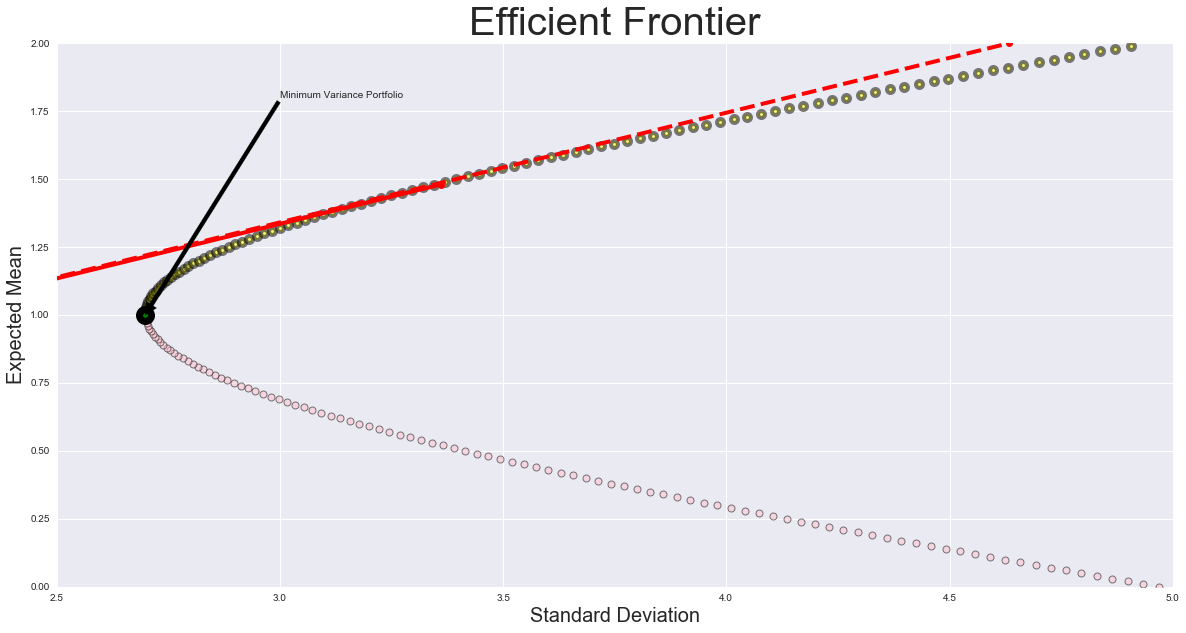

In [135]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.xlabel('Standard Deviation', fontsize=20)
plt.ylabel('Expected Mean', fontsize=20)
plt.title( 'Efficient Frontier', fontsize=40 )

Exp_Return_Std_dev_Rmv = [0,Std_deviation_Portfolio_with_RiskfreeAsset(2,0.13)]
Intercept = [ 0.13,2]
plt.plot(Exp_Return_Std_dev_Rmv, Intercept, color='red', marker='o',linestyle='dashed',linewidth=4)


Expected_Return_Tangent_Portfolio = [0,3.36]
st = [0.13,1.48,]
plt.plot(Expected_Return_Tangent_Portfolio,st, color='red', marker='o',linewidth=4)


plt.xlim(2.5,5)
plt.ylim(0,2)

df_exp_front[df_exp_front["Exp_Return"] >= 1]
plt.scatter(df_exp_front[df_exp_front["Exp_Return"] >= 1].Exp_Return_Std_dev_Rmv.values,df_exp_front[df_exp_front["Exp_Return"] >= 1].Exp_Return.values,c='yellow',edgecolor='black',linewidth=4, alpha = 0.5)
plt.scatter(df_exp_front[df_exp_front["Exp_Return"] < 1].Exp_Return_Std_dev_Rmv.values,df_exp_front[df_exp_front["Exp_Return"] < 1].Exp_Return.values,c='pink',edgecolor='black',linewidth=1, alpha = 0.5)
#plt.plot(Exp_Return_Std_dev_Rmv, Intercept, color='blue', marker='o',linestyle='dashed',linewidth=4)
plt.scatter(minimum_variance.Exp_Return_Std_dev_Rmv.values,minimum_variance.Exp_Return.values,c='green',edgecolor='black',linewidth=12)
plt.annotate('Minimum Variance Portfolio', xy=(2.698,1), xytext=(3.0, 1.8), arrowprops=dict(facecolor='black', shrink=20.15))

> ### 18. Explain economic significance and relevance of the minimum -variance frontier to an investor
- Minimum variance portfolio is the portfolio with the smallest variance ( std. Deviation ) among all the possible portfolios possibilities curve. On the portfolio possibilities curve, the minimum variance portfolio represents the left msot point on the curve.

> ### 19. Explain the economic significance and relevance of the efficient frontier to an investor
- All portfolios lying on the inside of the curve are inefficient. All rational investors prefer the portfolio on the upper side of the curve.
- All portfolio on the upper side has minimum risk of all the portfolios with the same expected return. 
- Maximum expected return for all portfolios with the same risk

> ### 20. Explain the economic significance and relevance of the tangency portfolio to an investor
>> When the risk free asset is combined with the risky portfolio P, the efficient frontier becomes a line with:
- Intercept equal to the risk free rate and 
- the slope equal to the reward to risk ratio for the risky portfolio

>> The point of tangency , portfolio P, is known as the market portfolio. 
This portfolio contains all available risky assets in proportion to their total market values
- If all investors agree on the efficient frontier, they will hold a combination of the market portfolio and the risk-free asset. 
- Risk-Averse investors will create lower risk portfolios by lending.
- More Risk-tolerant investors will increase portfolio return by borrowing at the risk-free rate.